In [1]:
# packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import altair as alt

/Users/macarthurbeggs/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.2
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# read East Santa Barbara Standard Meteorological Data
ESBdf = pd.read_csv('/Users/macarthurbeggs/Downloads/PSTAT 100/PSTAT 100 Group Project Data/East Santa Barbara Buoy Data 2022.csv')
ESBdf

/Users/macarthurbeggs/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE
0,#yr,mo,dy,hr,mn,degT,m/s,m/s,m,sec,sec,degT,hPa,degC,degC,degC,mi,ft
1,2022,1,1,0,0,286,13.1,16.2,99,99,99,999,1007.1,13.1,13.3,8.2,99,99
2,2022,1,1,0,10,274,12.4,15.9,99,99,99,999,1007.3,13,13.3,8.3,99,99
3,2022,1,1,0,20,268,11.7,14.4,99,99,99,999,1007.4,13,13.3,8.5,99,99
4,2022,1,1,0,30,270,11.1,14,99,99,99,999,1007.4,13,13.3,8.6,99,99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52476,2022,12,31,23,10,156,2.4,3.5,1.32,12.12,7.43,268,1011.7,15.0,14.8,999,99,99
52477,2022,12,31,23,20,162,2.3,3.2,99.0,99.0,99.0,999,1011.6,15.0,14.8,999,99,99
52478,2022,12,31,23,30,157,2.0,3.1,99.0,99.0,99.0,999,1011.4,15.0,14.8,999,99,99
52479,2022,12,31,23,40,163,2.9,4.5,1.39,12.12,7.57,270,1011.2,15.2,14.7,999,99,99


In [3]:
# Metadata

# get variables
cols = ESBdf.columns
cols

# get units
units = ESBdf.iloc[0]
units = list(units)

# create dataframe
desc = {'Variable': cols,
        'Description': ['Year', 'Month', 'Day', 'Hour', 'Minute', 
                        'Wind direction (the direction the wind is coming from in degrees clockwise from true N) during the same period used for WSPD.',
                        'Wind speed (m/s) averaged over an eight-minute period for buoys and a two-minute period for land stations.',
                        'Peak 5 or 8 second gust speed (m/s) measured during the eight-minute or two-minute period.',
                        'Significant wave height (meters) is calculated as the average of the highest one-third of all of the wave heights during the 20-minute sampling period.',
                        'Dominant wave period (seconds) is the period with the maximum wave energy.',
                        'Average wave period (seconds) of all waves during the 20-minute period.',
                        'The direction from which the waves at the dominant period (DPD) are coming. The units are degrees from true North, increasing clockwise, with North as 0 (zero) degrees and East as 90 degrees.',
                        'Sea level pressure',
                        'Air temperature',
                        'Sea surface temperature',
                        'Dewpoint temperature taken at the same height as the air temperature measurement',
                        'Station visibility (nautical miles). Note that buoy stations are limited to reports from 0 to 1.6 nmi.',
                        'The water level in feet above or below Mean Lower Low Water (MLLW).'],
        'Units': units}
metadata = pd.DataFrame(desc)

pd.set_option('display.max_colwidth', None)
metadata

,Variable,Description,Units
0,#YY,Year,#yr
1,MM,Month,mo
2,DD,Day,dy
3,hh,Hour,hr
4,mm,Minute,mn
5,WDIR,Wind direction (the direction the wind is coming from in degrees clockwise from true N) during the same period used for WSPD.,degT
6,WSPD,Wind speed (m/s) averaged over an eight-minute period for buoys and a two-minute period for land stations.,m/s
7,GST,Peak 5 or 8 second gust speed (m/s) measured during the eight-minute or two-minute period.,m/s
8,WVHT,Significant wave height (meters) is calculated as the average of the highest one-third of all of the wave heights during the 20-minute sampling period.,m
9,DPD,Dominant wave period (seconds) is the period with the maximum wave energy.,sec


In [4]:
# add location to ESB observations
ESBdf['Location'] = 'East Santa Barbara'

# drop units row
ESBdf.drop(0,axis=0,inplace = True)

In [5]:
# read Santa Monica Basin Standard Meteorological Data
SMBdf = pd.read_csv('/Users/macarthurbeggs/Downloads/PSTAT 100/PSTAT 100 Group Project Data/Santa Monica Basin Buoy Data 2022.csv')

# add location to observations
SMBdf['Location'] = 'Santa Monica Basin'

# drop units row
SMBdf.drop(0,axis=0,inplace = True)
SMBdf

/Users/macarthurbeggs/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Location
1,2022,1,1,0,0,294,9.2,11.3,99,99,99,999,1006.1,13.6,13.5,8.9,99,99,Santa Monica Basin
2,2022,1,1,0,10,287,8,10.9,99,99,99,999,1006.4,13.6,13.5,8.9,99,99,Santa Monica Basin
3,2022,1,1,0,20,289,6,9.7,99,99,99,999,1006.4,13.6,13.5,9.2,99,99,Santa Monica Basin
4,2022,1,1,0,30,296,8.6,11,99,99,99,999,1006.1,13.5,13.5,8.9,99,99,Santa Monica Basin
5,2022,1,1,0,40,292,7.2,9.5,2.2,7.69,5.44,261,1006.2,13.5,13.5,8.9,99,99,Santa Monica Basin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52472,2022,12,31,23,10,174,6.4,9.0,1.46,11.43,6.46,280,1013.6,14.7,14.9,14.1,99,99,Santa Monica Basin
52473,2022,12,31,23,20,170,7.4,9.4,99.0,99.0,99.0,999,1013.6,14.6,999.0,14.0,99,99,Santa Monica Basin
52474,2022,12,31,23,30,172,7.5,9.4,99.0,99.0,99.0,999,1013.6,14.6,15.0,14.0,99,99,Santa Monica Basin
52475,2022,12,31,23,40,170,7.1,9.0,1.29,11.43,5.59,241,1013.5,14.6,15.0,14.0,99,99,Santa Monica Basin


In [6]:
# read San Clemente Basin Standard Meteorological Data
SCBdf = pd.read_csv('/Users/macarthurbeggs/Downloads/PSTAT 100/PSTAT 100 Group Project Data/San Clemente Basin Buoy Data 2022.csv')

# add location to observations
SCBdf['Location'] = 'San Clemente Basin'

# drop units row
SCBdf.drop(0,axis=0,inplace = True)
SCBdf

/Users/macarthurbeggs/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Location
1,2022,1,1,0,0,300,10.9,14.2,99,99,99,999,1007.8,13.6,15,8.8,99,99,San Clemente Basin
2,2022,1,1,0,10,298,10.9,13.8,99,99,99,999,1007.8,13.6,15,8.7,99,99,San Clemente Basin
3,2022,1,1,0,20,291,11,14,99,99,99,999,1007.6,13.6,15,8.8,99,99,San Clemente Basin
4,2022,1,1,0,30,293,10.8,13.6,99,99,99,999,1007.7,13.6,15,8.7,99,99,San Clemente Basin
5,2022,1,1,0,40,295,9.8,12.3,2.87,8.33,6.32,292,1007.7,13.6,15,9.1,99,99,San Clemente Basin
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52527,2022,12,31,23,10,183,4.7,5.8,1.64,14.81,9.47,214,1014.3,14.6,15.9,13.6,99,99,San Clemente Basin
52528,2022,12,31,23,20,180,4.7,5.6,99.0,99.0,99.0,999,1014.3,14.6,15.9,13.7,99,99,San Clemente Basin
52529,2022,12,31,23,30,179,4.1,4.9,99.0,99.0,99.0,999,1014.4,14.6,15.9,13.7,99,99,San Clemente Basin
52530,2022,12,31,23,40,179,4.0,5.4,1.65,14.81,9.75,223,1014.4,14.6,15.9,13.7,99,99,San Clemente Basin


In [7]:
# concatenate dataframes
df = pd.concat([ESBdf, SMBdf, SCBdf])
df

,#YY,MM,DD,hh,mm,WDIR,WSPD,GST,WVHT,DPD,APD,MWD,PRES,ATMP,WTMP,DEWP,VIS,TIDE,Location
1,2022,1,1,0,0,286,13.1,16.2,99,99,99,999,1007.1,13.1,13.3,8.2,99,99,East Santa Barbara
2,2022,1,1,0,10,274,12.4,15.9,99,99,99,999,1007.3,13,13.3,8.3,99,99,East Santa Barbara
3,2022,1,1,0,20,268,11.7,14.4,99,99,99,999,1007.4,13,13.3,8.5,99,99,East Santa Barbara
4,2022,1,1,0,30,270,11.1,14,99,99,99,999,1007.4,13,13.3,8.6,99,99,East Santa Barbara
5,2022,1,1,0,40,269,10.2,12.7,1.91,7.14,5.12,266,1007.4,12.9,13.3,8.6,99,99,East Santa Barbara
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52527,2022,12,31,23,10,183,4.7,5.8,1.64,14.81,9.47,214,1014.3,14.6,15.9,13.6,99,99,San Clemente Basin
52528,2022,12,31,23,20,180,4.7,5.6,99.0,99.0,99.0,999,1014.3,14.6,15.9,13.7,99,99,San Clemente Basin
52529,2022,12,31,23,30,179,4.1,4.9,99.0,99.0,99.0,999,1014.4,14.6,15.9,13.7,99,99,San Clemente Basin
52530,2022,12,31,23,40,179,4.0,5.4,1.65,14.81,9.75,223,1014.4,14.6,15.9,13.7,99,99,San Clemente Basin


In [8]:
# convert all numeric columns to float
int_columns = df.columns[:-1]
df[int_columns] = df[int_columns].astype(float)

<AxesSubplot:>

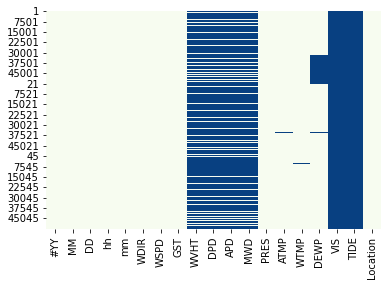

In [9]:
# set missing values to NaN
df.replace([99, 999.0], np.nan, inplace=True)

# create heatmap to visualize missing values
missing_values = df.isna()
sns.heatmap(missing_values, cmap='GnBu', cbar=False)

<AxesSubplot:>

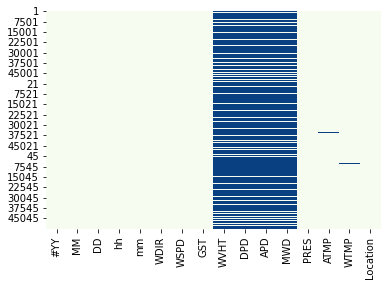

In [10]:
# drop columns DEWP, VIS, TIDE
df = df.drop(df.columns[[15,16,17]], axis=1)

missing_values = df.isna()
sns.heatmap(missing_values, cmap='GnBu', cbar=False)

In [11]:
# drop observations without surface wave data
df = df.dropna()

In [12]:
# set index to Location
df.set_index(['Location', '#YY', 'MM', 'DD', 'hh'], inplace =True)
df

mm   WDIR  WSPD   GST  WVHT  \
Location           #YY    MM   DD   hh                                    
East Santa Barbara 2022.0 1.0  1.0  0.0   40.0  269.0  10.2  12.7  1.91   
                                    1.0   40.0  292.0  14.8  18.4  2.07   
                                    2.0   40.0  274.0  11.1  14.0  2.02   
                                    3.0   40.0  297.0  11.4  14.6  2.24   
                                    4.0   40.0  291.0  10.1  14.4  2.13   
...                                        ...    ...   ...   ...   ...   
San Clemente Basin 2022.0 12.0 31.0 21.0  40.0  220.0   3.0   4.0  1.51   
                                    22.0  10.0  207.0   3.1   4.3  1.65   
                                    22.0  40.0  187.0   3.6   4.6  1.69   
                                    23.0  10.0  183.0   4.7   5.8  1.64   
                                    23.0  40.0  179.0   4.0   5.4  1.65   

                                            DPD   APD    MWD    PRES  ATMP  \
Location           #YY    MM   DD   hh                                       
East Santa Barbara 2022.0 1.0  1.0  0.0    7.14  5.12  266.0  1007.4  12.9   
                                    1.0    6.67  5.19  249.0  1006.7  12.7   
                                    2.0    7.14  5.37  261.0  1008.4  12.4   
                                    3.0    6.25  5.45  265.0  1009.1  12.4   
                                    4.0    9.09  5.58  254.0  1009.4  12.3   
...                                         ...   ...    ...     ...   ...   
San Clemente Basin 2022.0 12.0 31.0 21.0  14.81  8.95  209.0  1015.0  14.4   
                                    22.0  11.43  9.41  267.0  1014.7  14.5   
                                    22.0  11.43  9.89  273.0  1014.3  14.5   
                                    23.0  14.81  9.47  214.0  1014.3  14.6   
                                    23.0  14.81  9.75  223.0  1014.4  14.6   

                                          WTMP  
Location           #YY    MM   DD   hh          
East Santa Barbara 2022.0 1.0  1.0  0.0   13.3  
                                    1.0   13.3  
                                    2.0   13.3  
                                    3.0   13.3  
                                    4.0   13.3  
...                                        ...  
San Clemente Basin 2022.0 12.0 31.0 21.0  15.9  
                                    22.0  15.9  
                                    22.0  15.9  
                                    23.0  15.9  
                                    23.0  15.9  

[31500 rows x 11 columns]

In [13]:
# check spread of cleaned data over months for East Santa Barbara
ESBdf = df[df.index.get_level_values(0) == 'East Santa Barbara']
value_counts = ESBdf.index.get_level_values(2).value_counts()
value_counts

12.0    1468
11.0    1242
3.0      737
7.0      737
1.0      736
10.0     736
5.0      727
4.0      711
6.0      710
9.0      703
2.0      662
8.0      662
Name: MM, dtype: int64

In [14]:
# check spread of cleaned data over months for Santa Monica Basin
SMBdf = df[df.index.get_level_values(0) == 'Santa Monica Basin']
value_counts = SMBdf.index.get_level_values(2).value_counts()
value_counts

12.0    1475
10.0    1463
11.0    1424
9.0      770
1.0      742
3.0      736
7.0      733
5.0      728
4.0      713
6.0      713
2.0      664
8.0      651
Name: MM, dtype: int64

In [15]:
# check spread of cleaned data over months for Santa Monica Basin
SCBdf = df[df.index.get_level_values(0) == 'San Clemente Basin']
value_counts = SCBdf.index.get_level_values(2).value_counts()
value_counts

10.0    1482
12.0    1478
11.0    1434
9.0      761
1.0      740
7.0      737
3.0      736
5.0      719
4.0      717
6.0      712
8.0      677
2.0      664
Name: MM, dtype: int64

In [16]:
# Creating 16-wind compass rose bins for direction columns

# Create 22.5 degrees bins for the 16 directions
bins = np.arange(-11.25, 371.25, 22.5)

# Create 16-wind compass rose direction labels
labels = ['N', 'NNE', 'NE', 'ENE', 'E', 'ESE', 'SE', 'SSE', 'S', 'SSW', 'SW', 'WSW', 'W', 'WNW', 'NW', 'NNW']

# Create new columns with the binned directions
df['WDIR_binned'] = pd.cut(df['WDIR'], bins=bins, labels=labels, include_lowest=True)
df['MWD_binned'] = pd.cut(df['MWD'], bins=bins, labels=labels, include_lowest=True)

df[df['MWD_binned'] == 'WNW']

mm   WDIR  WSPD  GST  WVHT    DPD  \
Location           #YY    MM   DD   hh                                          
East Santa Barbara 2022.0 1.0  2.0  22.0  40.0  266.0   3.2  4.3  0.66  13.79   
                               3.0  14.0  40.0  229.0   0.6  1.4  0.63  12.12   
                                    15.0  40.0  218.0   0.3  1.0  0.63  13.79   
                                    20.0  40.0  280.0   4.8  5.9  0.64  13.79   
                               4.0  17.0  40.0   61.0   1.2  2.3  1.11  14.81   
...                                        ...    ...   ...  ...   ...    ...   
San Clemente Basin 2022.0 12.0 30.0 22.0  40.0  318.0   2.3  3.3  1.73  12.12   
                               31.0 0.0   10.0  308.0   2.3  3.5  1.66  12.90   
                                    11.0  10.0  298.0   3.0  4.1  1.61  12.12   
                                    12.0  10.0  284.0   1.5  2.3  1.49  12.12   
                                    16.0  10.0  213.0   3.1  4.6  1.47  12.12   

                                           APD    MWD    PRES  ATMP  WTMP  \
Location           #YY    MM   DD   hh                                      
East Santa Barbara 2022.0 1.0  2.0  22.0  5.75  289.0  1023.6  13.9  13.7   
                               3.0  14.0  7.39  285.0  1023.0  11.6  13.4   
                                    15.0  7.64  288.0  1023.3  11.8  13.5   
                                    20.0  5.90  282.0  1023.5  12.7  13.9   
                               4.0  17.0  5.38  291.0  1025.5  13.2  13.8   
...                                        ...    ...     ...   ...   ...   
San Clemente Basin 2022.0 12.0 30.0 22.0  9.57  282.0  1018.0  15.1  16.2   
                               31.0 0.0   9.39  287.0  1018.5  15.2  16.3   
                                    11.0  8.45  286.0  1017.1  15.0  15.9   
                                    12.0  8.43  284.0  1016.6  14.8  15.9   
                                    16.0  8.29  283.0  1016.7  14.1  15.9   

                                         WDIR_binned MWD_binned  
Location           #YY    MM   DD   hh                           
East Santa Barbara 2022.0 1.0  2.0  22.0           W        WNW  
                               3.0  14.0          SW        WNW  
                                    15.0          SW        WNW  
                                    20.0           W        WNW  
                               4.0  17.0         ENE        WNW  
...                                              ...        ...  
San Clemente Basin 2022.0 12.0 30.0 22.0          NW        WNW  
                               31.0 0.0           NW        WNW  
                                    11.0         WNW        WNW  
                                    12.0         WNW        WNW  
                                    16.0         SSW        WNW  

[4559 rows x 13 columns]

In [17]:
summary = df.describe()
summary.to_csv('/Users/macarthurbeggs/Downloads/PSTAT 100/summary.csv')

In [18]:
### waves
#sns.displot(df['WVHT'], kind ='kde')
#sns.displot(df['DPD'], kind ='kde')
#sns.displot(df['MWD'], kind ='kde')

### wind
#sns.displot(df['WSPD'], kind ='kde')
#sns.displot(df['WDIR'], kind ='kde')

# Surface Wave Plots

In [19]:
# group by month to view mean of hourly wave height over time
byMonth = df.groupby(['Location', 'MM']).mean().reset_index()
by_mo_hr = df.groupby(['Location', 'MM', 'hh']).mean().reset_index()
Jan = by_mo_hr[by_mo_hr['MM'] ==1]
Feb = by_mo_hr[by_mo_hr['MM'] ==2]
Mar = by_mo_hr[by_mo_hr['MM'] ==3]
Apr = by_mo_hr[by_mo_hr['MM'] ==4]
May = by_mo_hr[by_mo_hr['MM'] ==5]
Jun = by_mo_hr[by_mo_hr['MM'] ==6]
Jul = by_mo_hr[by_mo_hr['MM'] ==7]
Aug = by_mo_hr[by_mo_hr['MM'] ==8]
Sep = by_mo_hr[by_mo_hr['MM'] ==9]
Oct = by_mo_hr[by_mo_hr['MM'] ==10]
Nov = by_mo_hr[by_mo_hr['MM'] ==11]
Dec = by_mo_hr[by_mo_hr['MM'] ==12]

## Significant Wave Height

### Hourly means plotted over months

In [20]:
# plot
alt.Chart(by_mo_hr).mark_boxplot().encode(
    x =alt.X('MM:Q'),
    y =alt.Y('WVHT:Q'),
    color='Location:N'
).properties(
    width=180,
    height=180
).facet(
    column='Location:N'
)

alt.FacetChart(...)

### Hourly means plotted over 24 hours, grouped by month

In [21]:
# plot
alt.Chart(by_mo_hr).mark_line().encode(
    x =alt.X('hh:Q'),
    y =alt.Y('WVHT:Q'),
    color='Location:N'
).properties(
    width=180,
    height=180
).facet(
    facet='MM:N',
    columns=3
)

alt.FacetChart(...)

## Dominant Swell Period
- Dominant swell period refers to the highest energetic waves. The higher the swell period, the more energy the wave holds.



In [22]:
# plot
alt.Chart(by_mo_hr).mark_boxplot().encode(
    x =alt.X('MM:Q'),
    y =alt.Y('DPD:Q'),
    color='Location:N'
).properties(
    width=180,
    height=180
).facet(
    column='Location:N'
)

alt.FacetChart(...)

In [23]:
# plot
alt.Chart(by_mo_hr).mark_line().encode(
    x =alt.X('hh:Q'),
    y =alt.Y('DPD:Q'),
    color='Location:N'
).properties(
    width=180,
    height=180
).facet(
    facet='MM:N',
    columns=3
)

alt.FacetChart(...)

## Dominant Swell Direction

In [24]:
# plot
alt.Chart(by_mo_hr).mark_boxplot().encode(
    x =alt.X('MM'),
    y =alt.Y('MWD', 
             scale=alt.Scale(domain=[169,304])), # S (169 degrees) to W (304 degrees)
    color='Location:N'
).properties(
    width=200,
    height=200
).facet(
    column='Location:N'
)

alt.FacetChart(...)

In [25]:
# plot
alt.Chart(by_mo_hr).mark_line().encode(
    x =alt.X('hh:Q'),
    y =alt.Y('MWD:Q',
             scale=alt.Scale(domain=[169,304])), # S (169 degrees) to W (304 degrees)
    color='Location:N'
).properties(
    width=180,
    height=180
).facet(
    facet='MM:N',
    columns=3
)

alt.FacetChart(...)

## Water Temperature

In [26]:
# plot
alt.Chart(by_mo_hr).mark_boxplot().encode(
    x =alt.X('MM'),
    y =alt.Y('WTMP',
            scale=alt.Scale(domain=[10, 24])),
    color='Location:N'
).properties(
    width=200,
    height=200
).facet(
    column='Location:N'
)

alt.FacetChart(...)

In [27]:
# plot
alt.Chart(by_mo_hr).mark_line().encode(
    x =alt.X('hh:Q'),
    y =alt.Y('WTMP:Q',
             scale=alt.Scale(domain=[10,24])), # S (169 degrees) to W (304 degrees)
    color='Location:N'
).properties(
    width=180,
    height=180
).facet(
    facet='MM:N',
    columns=3
)
# probably don't need

alt.FacetChart(...)

## Wind Plots

In [28]:
# plot mean of wind speed over time
alt.Chart(by_mo_hr).mark_boxplot().encode(
    x =alt.X('MM:Q'),
    y =alt.Y('WSPD:Q'),
    color='Location:N'
).properties(
    width=200,
    height=200
).facet(
    column='Location:N'
)

alt.FacetChart(...)

In [29]:
# plot
alt.Chart(by_mo_hr).mark_line().encode(
    x =alt.X('hh:Q'),
    y =alt.Y('WSPD:Q'),
    color='Location:N'
).properties(
    width=180,
    height=180
).facet(
    facet='MM:N',
    columns=3
)

alt.FacetChart(...)

## Wind Direction Plots

In [30]:
# plot mean of wind direction over time
alt.Chart(byMonth).mark_line().encode(
    x =alt.X('MM'),
    y =alt.Y('WDIR',
             scale=alt.Scale(domain=[175,360])),
    color='Location'
)

alt.Chart(...)

## Temperatures

In [31]:
alt.Chart(byMonth).mark_line().encode(
    x =alt.X('MM'),
    y =alt.Y('ATMP'),
    color='Location'
)

alt.Chart(...)

In [32]:
alt.Chart(byMonth).mark_line().encode(
    x =alt.X('MM'),
    y =alt.Y('WTMP'),
    color='Location'
)

alt.Chart(...)

In [33]:
byHour = byMonth.groupby(['Location', 'hh']).mean().reset_index()
byHour

KeyError: 'hh'

In [ ]:
alt.Chart(byHour).mark_line().encode(
    x =alt.X('hh'),
    y =alt.Y('WVHT'),
    color='Location'
)